In [1]:
import pandas as pd
from math import pow,sqrt
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Movies-IMDb.csv')

In [3]:
data.head()

,movieID,userRating,review,userID,url,movieName_y,movieCertification,movieRuntime,movieGenre,movieOveralRating,...,War,Mystery,History,Family,Animation,Sport,Music,Biography,Musical,Sci-Fi
0,1,6,The first act was interesting but as the story...,3953,/title/tt10620868/,#Alive,TV-MA,98 min,"Action, Drama, Horror",6.2,...,0,0,0,0,0,0,0,0,0,0
1,1,6,Typical zombie story. Obviously the budget is ...,6032,/title/tt10620868/,#Alive,TV-MA,98 min,"Action, Drama, Horror",6.2,...,0,0,0,0,0,0,0,0,0,0
2,1,6,I enjoyed the film.\nThe effects were hood wit...,4750,/title/tt10620868/,#Alive,TV-MA,98 min,"Action, Drama, Horror",6.2,...,0,0,0,0,0,0,0,0,0,0
3,1,3,I feel like i'm watching a CCTV video and obse...,11702,/title/tt10620868/,#Alive,TV-MA,98 min,"Action, Drama, Horror",6.2,...,0,0,0,0,0,0,0,0,0,0
4,1,5,#Alive is a South Korean film by first time di...,2120,/title/tt10620868/,#Alive,TV-MA,98 min,"Action, Drama, Horror",6.2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data['movieName'] = data.movieName_y
recData = data[['movieID','userRating','userID','movieName']]
recData

,movieID,userRating,userID,movieName
0,1,6,3953,#Alive
1,1,6,6032,#Alive
2,1,6,4750,#Alive
3,1,3,11702,#Alive
4,1,5,2120,#Alive
...,...,...,...,...
227916,10206,8,13509,Íslenski draumurinn
227917,10206,10,3979,Íslenski draumurinn
227918,10207,5,1363,"Ó Pai, Ó: Look at This"
227919,10207,8,6159,"Ó Pai, Ó: Look at This"


In [65]:
senti = pd.read_csv('sentiment_result1.csv')
senti = senti[['Sentiment','review']]
senti['userID']=(recData.userID.tolist())[:20000]
senti['movieID']=(recData.movieID.tolist())[:20000]
senti['movieName']=(recData.movieName.tolist())[:20000]

In [66]:
senti.head()
# Check!
# print(senti.review.iloc[199:200])
# print(data.review.iloc[199:200])

,Sentiment,review,userID,movieID,movieName
0,1,the first act was interesting but as the story...,3953,1,#Alive
1,1,typical zombie story. obviously the budget is ...,6032,1,#Alive
2,1,i enjoyed the film.\nthe effects were hood wit...,4750,1,#Alive
3,-1,i feel like i'm watching a cctv video and obse...,11702,1,#Alive
4,-1,#alive is a south korean film by first time di...,2120,1,#Alive


In [67]:
# Get sentiment
def sentiScore(userid,movieid):
    if senti.loc[(senti.userID==userid) & (recData.movieID == movieid),'Sentiment'].tolist()!=[]:
        return (senti.loc[(senti.userID==userid) & (senti.movieID == movieid),'Sentiment'].iloc[0])

# Function to get the list of all movie ids the specified user has rated.
def movieids(userid):
    return (senti.loc[(senti.userID==userid),'movieID'].tolist())

# Function to get the movie titles against the movie id.
def movieName(movieid):
    return (senti.loc[(senti.movieID == movieid),'movieName'].iloc[0])

In [106]:
def similarity_score(user1,user2):
    bothWatch = []
    for element in senti.loc[senti.userID==user1,'movieID'].tolist():
        if element in senti.loc[senti.userID==user2,'movieID'].tolist():
            bothWatch.append(element)
    if len(bothWatch) == 0 :
        return 0
    j = sum([sentiScore(user1,element) for element in bothWatch]) - sum([sentiScore(user2,element) for element in bothWatch])
    return 1/(1+abs(j))

In [107]:
def recommendation(userid):
    global senti
    user_ids = senti.userID.unique().tolist()
    total = {}
    sim = {}
    
    # Iterating over subset of user ids.
    for user in user_ids:
        
        # not comparing the user to itself (obviously!)
        if user == userid:
            continue
        
        # Getting similarity score between the users.
        score = similarity_score(userid,user)
        
        if score <= 0.3:
            continue
                
        # Getting weighted similarity score and sum of similarities between both the users.
        for movieid in movieids(user):
            # Only considering not watched/rated movies
            if movieid not in movieids(userid) or sentiScore(userid,movieid) == 0:
                total[movieid] = 0
                total[movieid] += sentiScore(user,movieid) * score
                print('calculating...')
    
    values = [i for i in total.values()]
    
    # Normalizing ratings
    ranking = sorted(total,key=total.get)
    ranking.reverse()
    
    # Getting movie titles against the movie ids.
    recommendations = [movieName(movieid) for movieid in ranking]
    
    recommendation.values = values
    recommendation.ranking = ranking
    recommendation.resommendations = recommendations[:5]
    
    return recommendation

In [108]:
t1 = recommendation(165)

calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculating...
calculatin

In [109]:
t1.values

[1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -0.3333333333333333,
 -0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 0.3333333333333333,
 -0.3333333333333333,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 -0.3333333333333333,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 -0.3333333333333333,
 1.0,
 1.0,
 -1.0,
 -0.3333333333333333,
 -0.3333333333333333,
 0.3333333333333333,
 -0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 -0.3333333333333333,
 0.3333333333333333,
 1.0,
 1.0,
 0.3333333333333333,
 -1.0]

In [114]:
x

['Assa',
 'Around the World in 80 Days',
 'American Reunion',
 'All the Money in the World',
 'Airlift']

<BarContainer object of 5 artists>

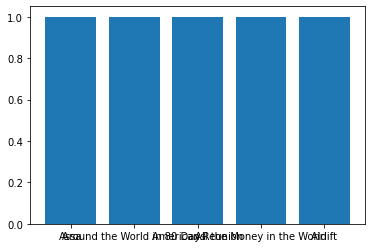

In [110]:
x = t1.resommendations
y = sorted(t1.values,reverse=True)[:5]
plt.bar(x,y)

In [117]:
rec = pd.DataFrame(x,columns = ['MovieName'])
rec['Scores'] = y
rec
recM = rec[['MovieName']]
recM

,MovieName
0,Assa
1,Around the World in 80 Days
2,American Reunion
3,All the Money in the World
4,Airlift


<BarContainer object of 5 artists>

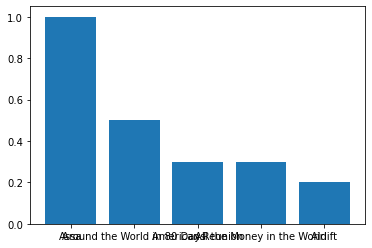

In [112]:
x  = t1.resommendations
y = [1,0.5,0.3,0.3,0.2]
plt.bar(x,y)